<a href="https://colab.research.google.com/github/FirySnehasis/Mathematical-Trading-Strategies/blob/main/Assignment2MTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import math
import matplotlib.pyplot as plt

In [ ]:
nsedata = yf.download('^NSEI', start='2010-01-01', end='2023-05-01')
nasdaqdata = yf.download('^IXIC', start='2010-01-01', end='2023-05-01')

nsedata['Daily Returns'] = 100*(nsedata['Close'] - nsedata['Open'])/(nsedata['Open'])
nasdaqdata['Daily Returns'] = 100*(nasdaqdata['Close'] - nasdaqdata['Open'])/(nasdaqdata['Open'])
nsedata = nsedata.reset_index()
nasdaqdata = nasdaqdata.reset_index()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
nsedata

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0,0.601825
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0,0.014212
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0,0.069151
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0,-0.354040
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0,-0.370423
...,...,...,...,...,...,...,...,...
3263,2023-04-24,17707.550781,17754.500000,17612.500000,17743.400391,17743.400391,255700,0.202454
3264,2023-04-25,17761.550781,17807.449219,17716.849609,17769.250000,17769.250000,297400,0.043348
3265,2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609,17813.599609,233000,0.260584
3266,2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781,17915.050781,241400,0.572338


In [ ]:
nasdaqdata

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns
0,2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000,0.610615
1,2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000,0.062409
2,2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000,-0.286859
3,2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000,0.085287
4,2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000,1.087579
...,...,...,...,...,...,...,...,...
3348,2023-04-24,12053.469727,12103.580078,11960.299805,12037.200195,12037.200195,4854050000,-0.134978
3349,2023-04-25,11968.809570,11990.459961,11798.769531,11799.160156,11799.160156,4806020000,-1.417429
3350,2023-04-26,11913.230469,11967.990234,11833.070312,11854.349609,11854.349609,5281970000,-0.494248
3351,2023-04-27,11972.150391,12154.009766,11950.919922,12142.240234,12142.240234,5253710000,1.420713


In [ ]:
mergeddates = pd.merge(nsedata['Date'], nasdaqdata['Date'], on='Date')

In [ ]:
mergeddates

,Date
0,2010-01-04
1,2010-01-05
2,2010-01-06
3,2010-01-07
4,2010-01-08
...,...
3177,2023-04-24
3178,2023-04-25
3179,2023-04-26
3180,2023-04-27


In [ ]:
nsedata = nsedata[nsedata['Date'].isin(mergeddates['Date'])]
nasdaqdata = nasdaqdata[nasdaqdata['Date'].isin(mergeddates['Date'])]
nsedata = nsedata.reset_index()
nasdaqdata = nasdaqdata.reset_index()

In [ ]:
nsedata

,index,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns
0,0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0,0.601825
1,1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0,0.014212
2,2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0,0.069151
3,3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0,-0.354040
4,4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0,-0.370423
...,...,...,...,...,...,...,...,...,...
3177,3263,2023-04-24,17707.550781,17754.500000,17612.500000,17743.400391,17743.400391,255700,0.202454
3178,3264,2023-04-25,17761.550781,17807.449219,17716.849609,17769.250000,17769.250000,297400,0.043348
3179,3265,2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609,17813.599609,233000,0.260584
3180,3266,2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781,17915.050781,241400,0.572338


In [ ]:
nasdaqdata

,index,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns
0,0,2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000,0.610615
1,1,2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000,0.062409
2,2,2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000,-0.286859
3,3,2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000,0.085287
4,4,2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000,1.087579
...,...,...,...,...,...,...,...,...,...
3177,3348,2023-04-24,12053.469727,12103.580078,11960.299805,12037.200195,12037.200195,4854050000,-0.134978
3178,3349,2023-04-25,11968.809570,11990.459961,11798.769531,11799.160156,11799.160156,4806020000,-1.417429
3179,3350,2023-04-26,11913.230469,11967.990234,11833.070312,11854.349609,11854.349609,5281970000,-0.494248
3180,3351,2023-04-27,11972.150391,12154.009766,11950.919922,12142.240234,12142.240234,5253710000,1.420713


**Correlation Coefficient**

In [ ]:
Corrcoef = np.corrcoef(nsedata['Close'], nasdaqdata['Close'])[0,1]
print('The Correlation Coefficient is : '+str(Corrcoef))
print("It shows there exits a positive and a strong relationship between NASDAQ and NSE")

The Correlation Coefficient is : 0.9513138758576785
It shows there exits a positive and a strong relationship between NASDAQ and NSE


**Lead-Lag Relationship**

In [ ]:
################################

**Keltner Channel**

In [ ]:
nasdaqdata['Typical Price'] = (nasdaqdata['Close']+nasdaqdata['Low']+nasdaqdata['High'])/3
nasdaqdata['tr1'] = nasdaqdata['High']-nasdaqdata['Low']
nasdaqdata['tr2'] = nasdaqdata['High']-nasdaqdata['Close'].shift(1)
nasdaqdata['tr3'] = nasdaqdata['Low']-nasdaqdata['Close'].shift(1)
nasdaqdata['True Range'] = nasdaqdata[['tr1', 'tr2', 'tr3']].apply(lambda x: max(x), axis=1)
nasdaqdata['ATR']=nasdaqdata['True Range'].rolling(10).mean()

nasdaqdata['EMA'] = nasdaqdata['Typical Price'].ewm(span=20, adjust=False).mean()
# Upper Band
nasdaqdata['Upper Band Keltner'] = nasdaqdata['EMA'] + (2 * nasdaqdata['ATR'])
# Lower Band
nasdaqdata['Lower Band Keltner'] = nasdaqdata['EMA'] - (2 * nasdaqdata['ATR'])

**MACD Indicators**

In [ ]:
nasdaqdata['MACD'] = nasdaqdata['Close'].ewm(span=12, adjust=False).mean() - nasdaqdata['Close'].ewm(span=26, adjust=False).mean()
nasdaqdata['Signal Line MACD'] = nasdaqdata['MACD'].ewm(span=9, adjust=False).mean()

**Bollinger Bands**

In [ ]:
nasdaqdata['SMA'] = nasdaqdata['Typical Price'].rolling(window=20).mean()
nasdaqdata['STD'] = nasdaqdata['Typical Price'].rolling(window=20).std()
nasdaqdata['Upper Band Bollinger'] = nasdaqdata['SMA'] + (nasdaqdata['STD'] * 2)
nasdaqdata['Lower Band Bollinger'] = nasdaqdata['SMA'] - (nasdaqdata['STD'] * 2)

In [ ]:
nasdaqdata

,index,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Typical Price,...,ATR,EMA,Upper Band Keltner,Lower Band Keltner,MACD,Signal Line MACD,SMA,STD,Upper Band Bollinger,Lower Band Bollinger
0,0,2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000,0.610615,2304.659912,...,NaN,2304.659912,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
1,1,2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000,0.062409,2306.020020,...,NaN,2304.789446,NaN,NaN,0.023137,0.004627,NaN,NaN,NaN,NaN
2,2,2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000,-0.286859,2303.613363,...,NaN,2304.677438,NaN,NaN,-0.566852,-0.109669,NaN,NaN,NaN,NaN
3,3,2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000,0.085287,2295.523356,...,NaN,2303.805621,NaN,NaN,-1.105601,-0.308855,NaN,NaN,NaN,NaN
4,4,2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000,1.087579,2308.460042,...,NaN,2304.248899,NaN,NaN,-0.149410,-0.276966,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,3348,2023-04-24,12053.469727,12103.580078,11960.299805,12037.200195,12037.200195,4854050000,-0.134978,12033.693359,...,146.670801,11976.116521,12269.458123,11682.774919,115.863822,130.006055,11994.968994,147.200190,12289.369374,11700.568615
3178,3349,2023-04-25,11968.809570,11990.459961,11798.769531,11799.160156,11799.160156,4806020000,-1.417429,11862.796549,...,149.764844,11965.324143,12264.853830,11665.794455,87.095753,121.423995,11998.928825,142.195028,12283.318880,11714.538770
3179,3350,2023-04-26,11913.230469,11967.990234,11833.070312,11854.349609,11854.349609,5281970000,-0.494248,11885.136719,...,158.660937,11957.687245,12275.009120,11640.365370,67.966701,110.732536,12002.608822,137.979997,12278.568815,11726.648828
3180,3351,2023-04-27,11972.150391,12154.009766,11950.919922,12142.240234,12142.240234,5253710000,1.420713,12082.389974,...,166.830957,11969.563696,12303.225610,11635.901782,75.170637,103.620156,12018.047314,127.917197,12273.881708,11762.212921


**Buy/Sell Signal by using Keltner Channel**

In [ ]:
nsedata['Typical Price'] = (nsedata['Close']+nsedata['Low']+nsedata['High'])/3
nsedata['tr1'] = nsedata['High']-nsedata['Low']
nsedata['tr2'] = nsedata['High']-nsedata['Close'].shift(1)
nsedata['tr3'] = nsedata['Low']-nsedata['Close'].shift(1)
nsedata['True Range'] = nsedata[['tr1', 'tr2', 'tr3']].apply(lambda x: max(x), axis=1)
nsedata['ATR']=nsedata['True Range'].rolling(10).mean()

nsedata['EMA'] = nsedata['Typical Price'].ewm(span=20, adjust=False).mean()
# Upper Band
nsedata['Upper Band Keltner'] = nsedata['EMA'] + (2 * nsedata['ATR'])
# Lower Band
nsedata['Lower Band Keltner'] = nsedata['EMA'] - (2 * nsedata['ATR'])

**Buy/Sell Signal by MACD**

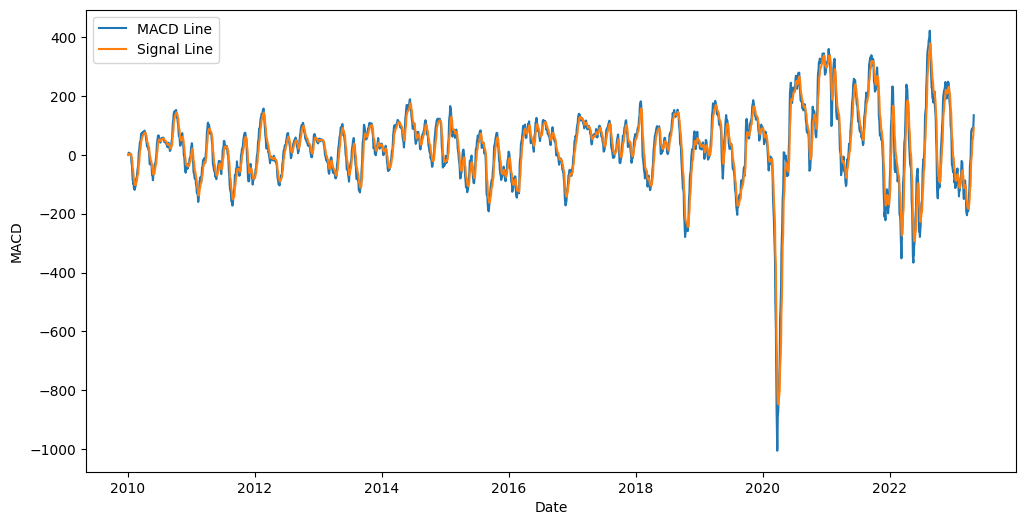

44
43


In [ ]:
nsedata['MACD'] = nsedata['Close'].ewm(span=12, adjust=False).mean() - nsedata['Close'].ewm(span=26, adjust=False).mean()
nsedata['Signal Line MACD'] = nsedata['MACD'].ewm(span=9, adjust=False).mean()
plt.figure(figsize=(12, 6))
plt.plot(nsedata['Date'], nsedata['MACD'], label="MACD Line")
plt.plot(nsedata['Date'], nsedata['Signal Line MACD'], label="Signal Line")
plt.xlabel("Date")
plt.ylabel("MACD")
plt.legend()
plt.show()
nsebuymacd=0
nsesellmacd=0
for i in range(3181):
  if(0>=nsedata.loc[i,'MACD'] and nsedata.loc[i+1,'MACD']>=0):
    nsebuymacd=nsebuymacd+1
  elif(0<=nsedata.loc[i,'MACD'] and nsedata.loc[i+1,'MACD']<=0):
    nsesellmacd=nsesellmacd+1
print(nsebuymacd)
print(nsesellmacd)

**Buy/Sell Signal by Bollinger Bands**

In [ ]:
nsedata['SMA'] = nsedata['Typical Price'].rolling(window=20).mean()
nsedata['STD'] = nsedata['Typical Price'].rolling(window=20).std()
nsedata['Upper Band Bollinger'] = nsedata['SMA'] + (nsedata['STD'] * 2)
nsedata['Lower Band Bollinger'] = nsedata['SMA'] - (nsedata['STD'] * 2)
for i in range(3181):
  if(abs((nsedata.loc[i,'Close']-nsedata.loc[i,'Upper Band Bollinger'])/(nsedata.loc[i,'Upper Band Bollinger']))<0.05):
    nsebuy